In [1]:
%run "000_shared_lib.ipynb"
import cv2


# Histogram Equilization
**What is it**
- THe histogram of an image is the graph of the frequency pixel intensity values.
- Equalization seeks to make uniform the spread of the pixel intensity values. So, increases intensity of low values and dumpens that of high values - low contrast areas gain contrast. 

**Why use it**
- enhance contrast - remove blur caused by lack of contrast. 
- 

**Methods**
1. Histogram Equilization ('default'): Transform to a target distribution, uniform distribution usually
    - normalize intensity values 
    - global operation
    
    
2. Adaptive Equilizaiton: 
    - hood-based operation (tile) 
    - normalize each tile to target distribution (uniform usually)
    - is more susceptible to noise
    - can be thresholdedto avoid amplifying noise 
    - May be good fit for foreground detection of subtle features
    
    
3. Contrast Stretching:
    - top/bottom percentil stretch to within available range (0-255) 
    - global operation 
    - The darkest bcome black and the lightest become white
    - Results are softer than others and so more appealing to human eye - may be better for social-photo-enhancement over medical images or for visual purposes than for machine use 
    
    
**TODO**
- My CDF is a flop :/
- OpenCV vs SKimage

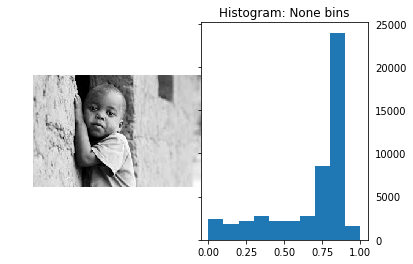

In [40]:
img = AnImage("media/img2.jpeg")
img.show()

In [42]:
def gen_histogram(img, n=256, nr=[0,256]):
    hist, binz = np.histogram(img.flatten(), n, nr)
    #hist = hist/hist.max()
    cdf = hist.cumsum()
    cdf_normd = (cdf*float(hist.max()))/cdf.max()
    plt.plot(cdf_normd, color='b')
    plt.hist(img.flatten(), n, nr, color='g')
    #plt.xlim(nr)
    #plt.ylim(nr)
    plt.legend(('cdf', 'hist'), loc='upper left')
    plt.show(); 
    

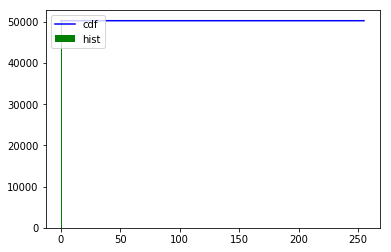

In [43]:
gen_histogram(img.img)

# Using SKImage

In [105]:
def equalize_histogram(img, binz=20, method=1):
    p2, p98 = np.percentile(img, (2,98))
    method_str = ['rescale', 'eq_hist', 'adapt_hist', '']
    method_fx = [
        (skimage.exposure.rescale_intensity, {'in_range':(p2,p98)}),
        (skimage.exposure.equalize_hist, {}),
        (skimage.exposure.equalize_adapthist, {'clip_limit':0.03}),
    ]
    plt.title(f"{method_str[method]}")
    plt.subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,2,2)
    plt.hist(img.flatten(), bins=binz, color='b')
    cdf, cbinz = skimage.exposure.cumulative_distribution(img, binz)
    plt.plot(cbinz, cdf, 'r')
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    
    fx = method_fx[method]
    img_eq = fx[0](img, **fx[1])
    
    plt.subplot(2,2,3)
    plt.imshow(img_eq, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,2,4)
    plt.hist(img_eq.flatten(), bins=binz, color='b')
    cdf, cbinz = skimage.exposure.cumulative_distribution(img_eq, binz)
    plt.plot(cbinz, cdf, 'r')
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    
    return img_eq
    

Default Equalize


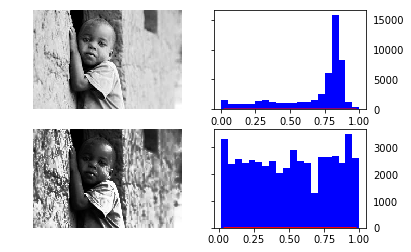

In [106]:
print('Default Equalize')
eq1 = equalize_histogram(img.img)

Adaptive Equalize


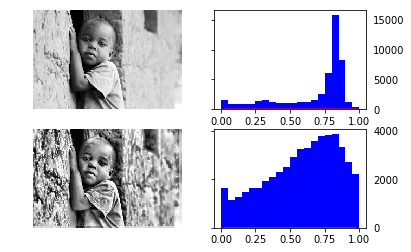

In [107]:
print('Adaptive Equalize')
eq2 = equalize_histogram(img.img, method=2)

Percentile Rescaling Contrast Stretching


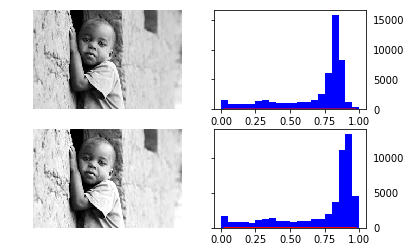

In [108]:
print('Percentile Rescaling Contrast Stretching')
eq0 = equalize_histogram(img.img, method=0)

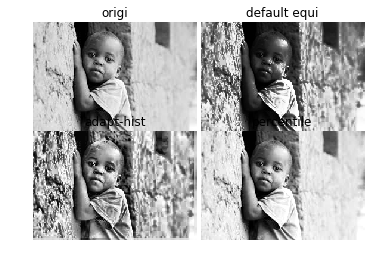

In [109]:
show_image_list([img.img, eq1, eq2, eq0], titlez=['origi', 'default equi', 'adapt-hist', 'percentile'], nc=2)

In [117]:
def equlization_flow(fpath, nc=4):
    img = AnImage(fpath)
    
    print('Default Equalize')
    eq1 = equalize_histogram(img.img, method=1)
    plt.show()
    plt.clf();
    
    print('Adaptive Equalize')
    eq2 = equalize_histogram(img.img, method=2)
    plt.show()
    plt.clf();
    
    print('Percentil Rescaling - Contrast Stretching')
    eq0 = equalize_histogram(img.img, method=0)
    plt.show()
    plt.clf();
    
    show_image_list([img.img, eq1, eq2, eq0], titlez=['origi', 'default equi', 'adapt-hist', 'percentile'], nc=nc)
    plt.show(); 

Default Equalize


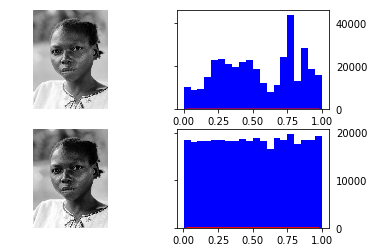

Adaptive Equalize


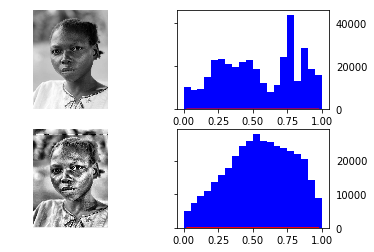

Percentil Rescaling - Contrast Stretching


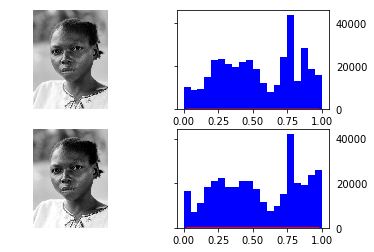

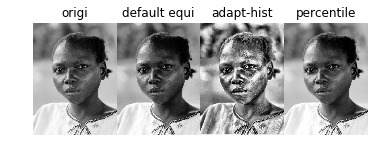

In [118]:
equlization_flow("media/img3.jpeg")

Default Equalize


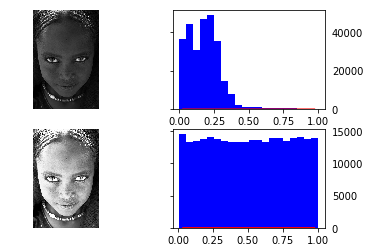

Adaptive Equalize


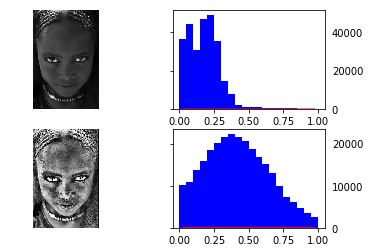

Percentil Rescaling - Contrast Stretching


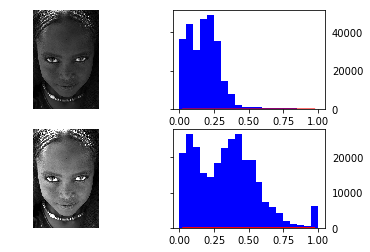

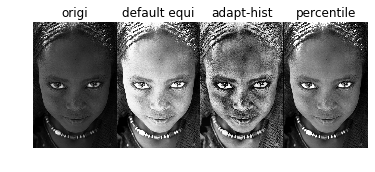

In [119]:
equlization_flow("media/img2.jpg")

Default Equalize


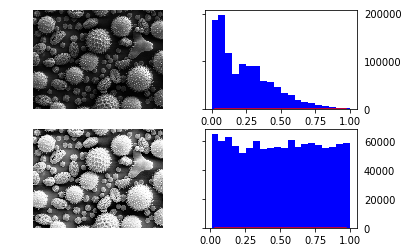

Adaptive Equalize


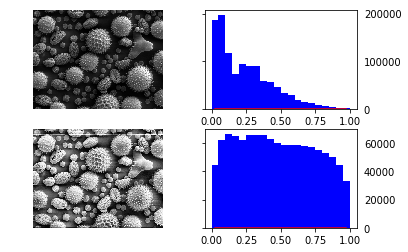

Percentil Rescaling - Contrast Stretching


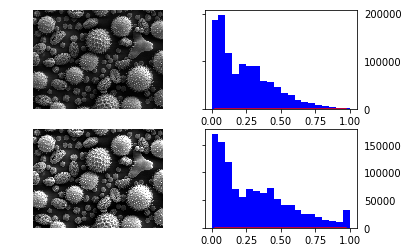

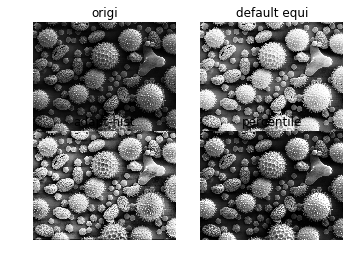

In [123]:
equlization_flow("media/pollen.jpg", nc=2)

Default Equalize


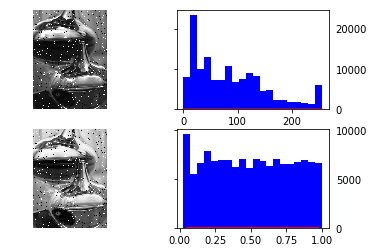

Adaptive Equalize


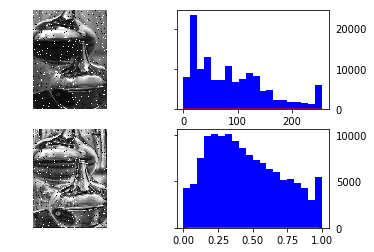

Percentil Rescaling - Contrast Stretching


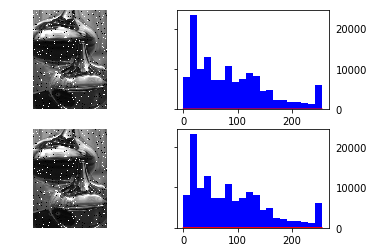

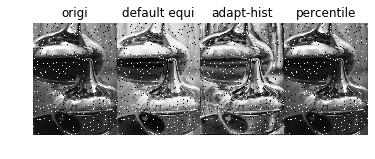

In [127]:
equlization_flow("media/Noise_salt_and_pepper.png", nc=4)